# Soccer Data
This dataset contains data of every game from the 2018-2019 season in the English Premier League. 

Not sure where to begin? Scroll to the bottom to find challenges!

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: What team commits the most fouls?
- 📊 **Visualize**: Plot the percentage of games that ended in a draw over time.
- 🔎 **Analyze**: Does the number of red cards a team receives have an effect on its probability of winning a game?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You have just been hired as a data analyst for a local soccer team. The team has recently signed on some junior players and wants to give them as much experience as possible without losing games. If the head coach could be confident in the outcome of a game by halftime, they would be more likely to give the junior players time on the field.

The coach has asked you whether you can predict the outcome of a game by the results at halftime and how confident you would be in the prediction. 

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

## Data Dictionary
| Column    | Explanation                                   |
| --------- | --------------------------------------------- |
| Div       | Division the game was played in               |                            
| Date      | The date the game was played                  |
| HomeTeam  | The home team                                 |
| AwayTeam  | The away team                                 |
| FTHG      | Full time home goals                          |
| FTAG      | Full time away goals                          |
| FTR       | Full time result                              |
| HTHG      | Half time home goals                          |
| HTAG      | Half time away goals                          |
| HTR       | Half time result                              |
| Referee   | The referee of the game                       |
| HS        | Number of shots taken by home team            |
| AS        | Number of shots taken by away team            |
| HST       | Number of shots taken by home team on target  |
| AST       | Number of shots taken by away team on target  |
| HF        | Number of fouls made by home team             |
| AF        | Number of fouls made by away team             |
| HC        | Number of corners taken by home team          |
| AC        | Number of corners taken by away team          |
| HY        | Number of yellow cards received by home team  |
| AY        | Number of yellow cards received by away team  |
| HR        | Number of red cards received by home team     |
| AR        | Number of red cards received by away team     |

[Source](https://data.world/chas/2018-2019-premier-league-matches) of dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("soccer18-19.csv")

In [3]:
# Group the data by the HomeTeam and calculate the sum of fouls made by each team
home_fouls = df.groupby('HomeTeam')['HF'].sum()

# Group the data by the AwayTeam and calculate the sum of fouls made by each team
away_fouls = df.groupby('AwayTeam')['AF'].sum()

# Combine the fouls made by both home and away teams
total_fouls = home_fouls.add(away_fouls, fill_value=0)

# Find the team with the most fouls
team_with_most_fouls = total_fouls.idxmax()

print("Team with the most fouls:", team_with_most_fouls)

Team with the most fouls: Brighton


In [4]:
# Total number of matches played in the season
total_matches = len(df)
print("Total Matches:", total_matches)

Total Matches: 380


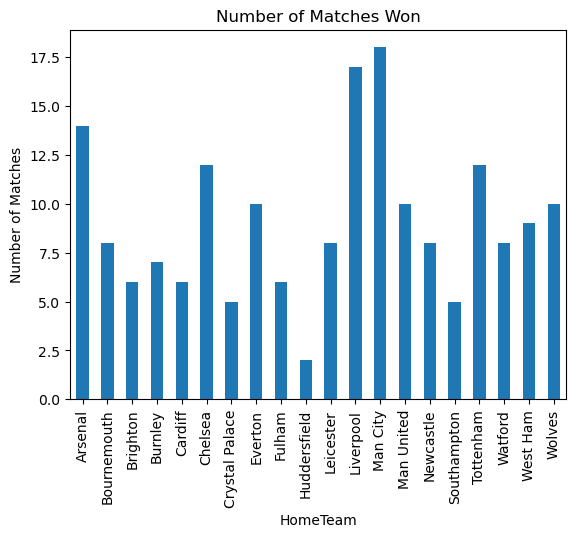

In [5]:
# Number of matches won by each team
matches_won = df.groupby('HomeTeam')['FTR'].apply(lambda x: (x == 'H').sum())
matches_won.plot(kind='bar', title='Number of Matches Won')
plt.ylabel('Number of Matches')
plt.show()

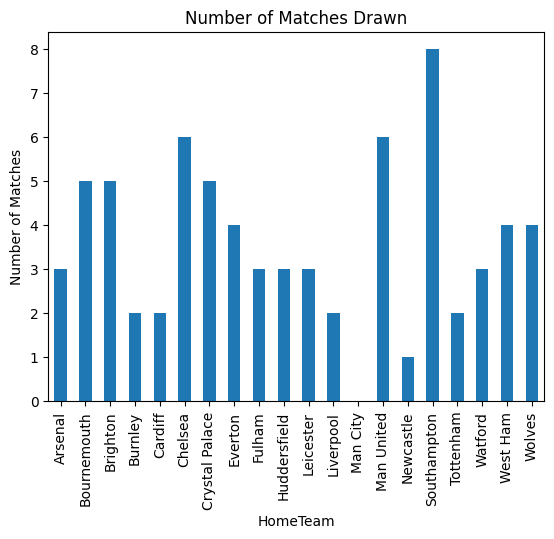

In [37]:

# Number of matches drawn by each team
matches_drawn = df.groupby('HomeTeam')['FTR'].apply(lambda x: (x == 'D').sum())
matches_drawn.plot(kind='bar', title='Number of Matches Drawn')
plt.ylabel('Number of Matches')
plt.show()

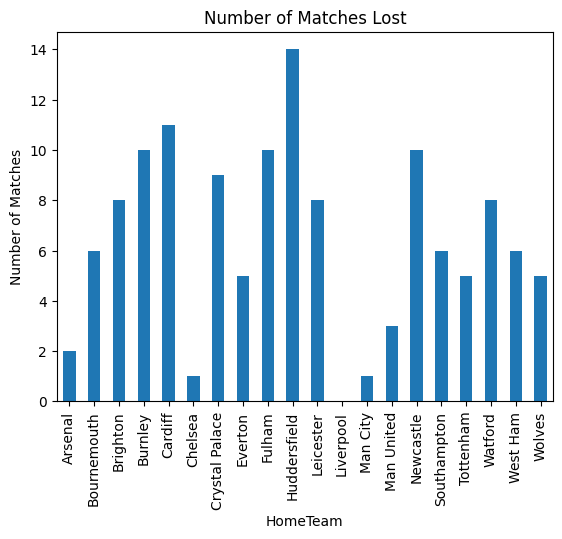

In [38]:
# Number of matches lost by each team
matches_lost = df.groupby('HomeTeam')['FTR'].apply(lambda x: (x == 'A').sum())
matches_lost.plot(kind='bar', title='Number of Matches Lost')
plt.ylabel('Number of Matches')
plt.show()

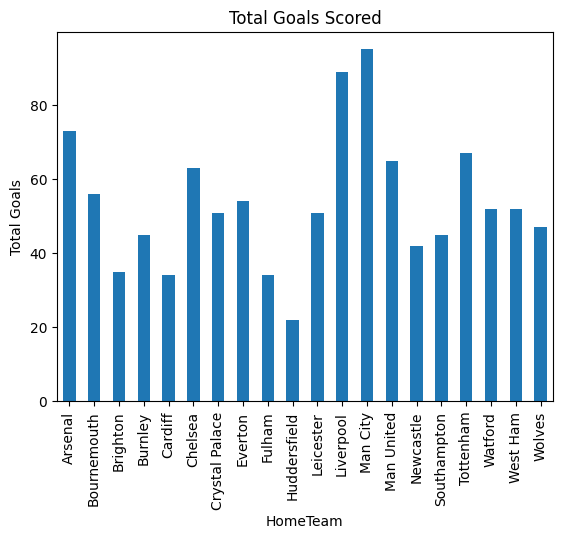

In [39]:
# Total goals scored by each team
total_goals = df.groupby('HomeTeam')['FTHG'].sum() + df.groupby('AwayTeam')['FTAG'].sum()
total_goals.plot(kind='bar', title='Total Goals Scored')
plt.ylabel('Total Goals')
plt.show()

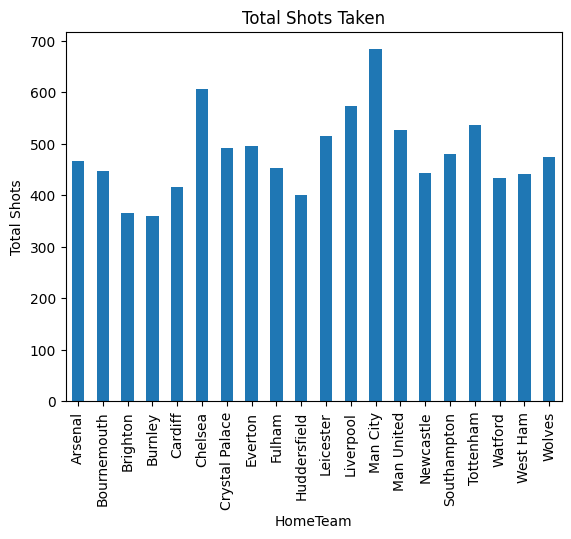

In [40]:
# Total number of shots taken by each team
total_shots = df.groupby('HomeTeam')['HS'].sum() + df.groupby('AwayTeam')['AS'].sum()
total_shots.plot(kind='bar', title='Total Shots Taken')
plt.ylabel('Total Shots')
plt.show()


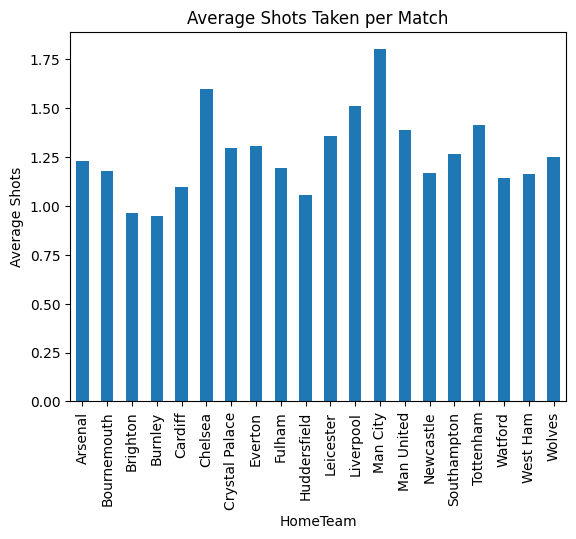

In [41]:
# Average number of shots taken per match for each team
average_shots = total_shots / total_matches
average_shots.plot(kind='bar', title='Average Shots Taken per Match')
plt.ylabel('Average Shots')
plt.show()


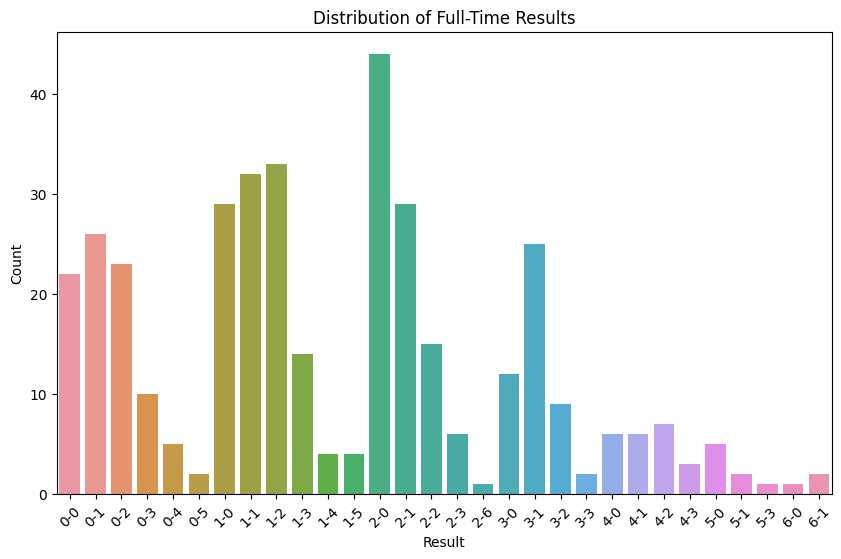

In [43]:
# Distribution of full-time results (bar chart)
result_distribution = df['FTHG'].astype(str) + '-' + df['FTAG'].astype(str)
result_distribution = result_distribution.value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=result_distribution.index, y=result_distribution.values)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Distribution of Full-Time Results')
plt.xticks(rotation=45)
plt.show()

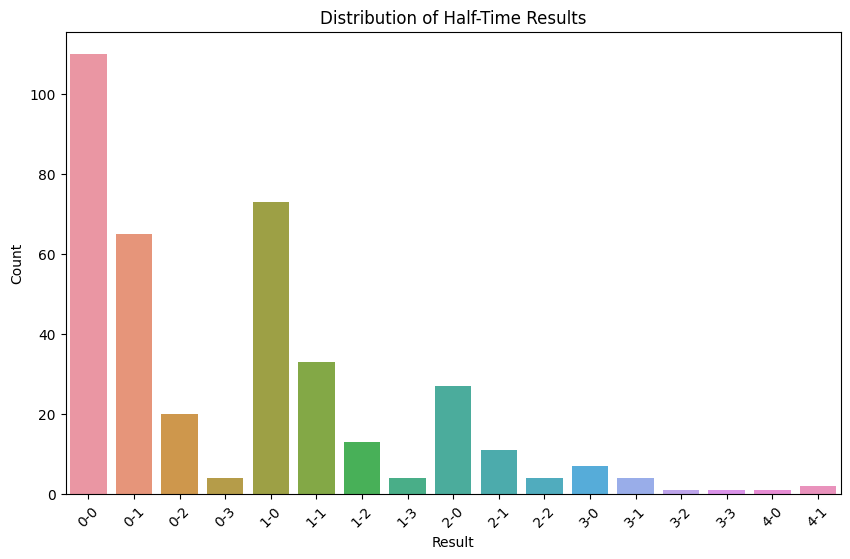

In [44]:
# Distribution of half-time results (bar chart)
half_time_result_distribution = df['HTHG'].astype(str) + '-' + df['HTAG'].astype(str)
half_time_result_distribution = half_time_result_distribution.value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=half_time_result_distribution.index, y=half_time_result_distribution.values)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Distribution of Half-Time Results')
plt.xticks(rotation=45)
plt.show()

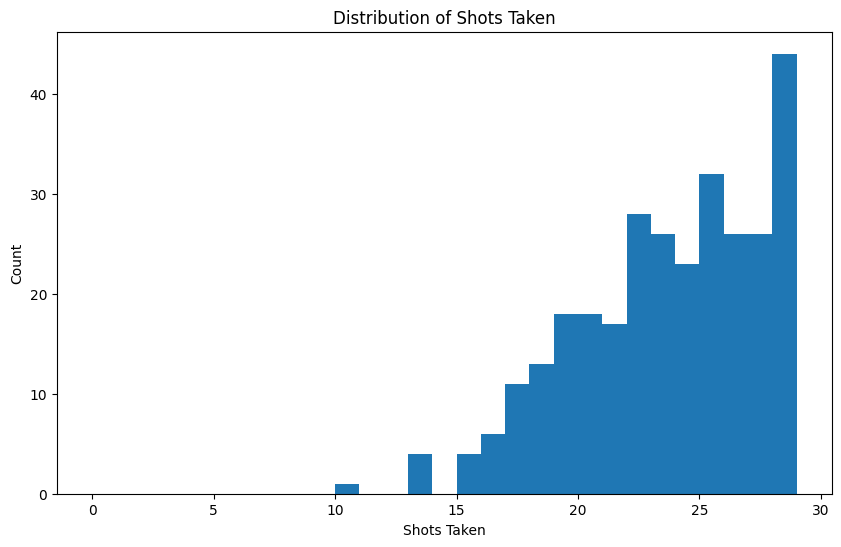

In [46]:
# Distribution of shots taken (histogram)
plt.figure(figsize=(10, 6))
plt.hist(df['HS'] + df['AS'], bins=range(30))
plt.xlabel('Shots Taken')
plt.ylabel('Count')
plt.title('Distribution of Shots Taken')
plt.show()

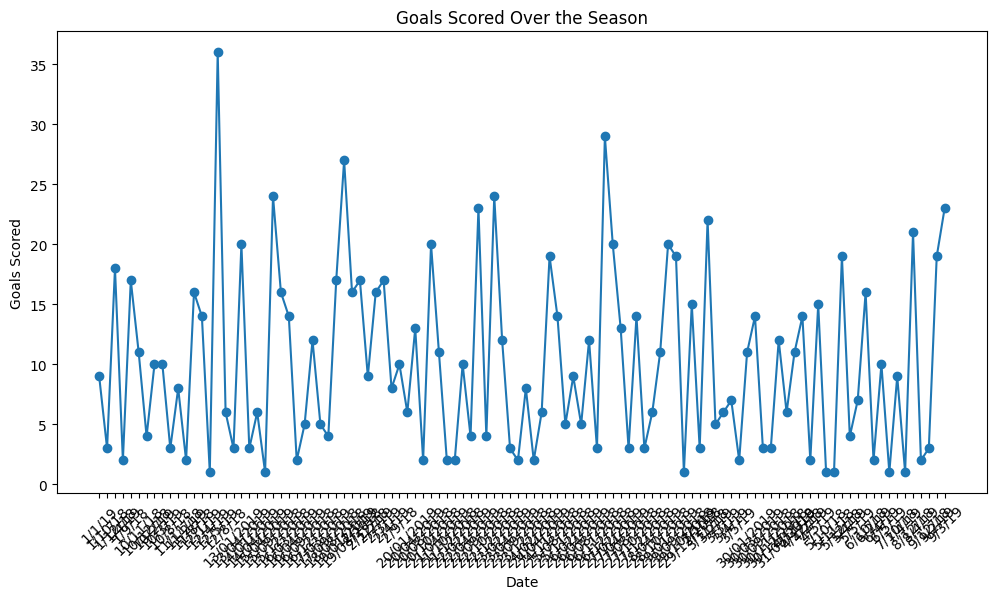

In [50]:
# Goals scored over the course of the season (line chart)
goals_over_season = df.groupby('Date')['FTHG'].sum() + df.groupby('Date')['FTAG'].sum()
plt.figure(figsize=(12, 6))
plt.plot(goals_over_season.index, goals_over_season.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Goals Scored')
plt.title('Goals Scored Over the Season')
plt.xticks(rotation=45)
plt.show()